Félicitations à tous les étudiants qui passent l'examen certifiant de Data Analyst avec la Wild Scode School !  

Faire une copie de ce google collab, pour répondre au différentes questions.
Vous avez parcouru un chemin remarquable dans votre apprentissage des compétences analytiques et votre maîtrise des techniques de traitement des données.  
Vous serez évalué sur des compétences à travers 3 cas pratiques:
- SQL
- Immobilier
- Business Case Olist

Vous pouvez effectuer les cas pratiques dans l'ordre que vous souhaitez. Pour vous aider dans votre organisation de travail, vous trouverez une estimation du temps pour chaque partie.  
En ce qui concerne les réponses écrites, pensez à bien soigner les explications, comme si vous répondiez à un client.

**Votre google collab qui contient toutes vos réponses à l'examen devra être déposé au plus tard ______. Pensez bien à rendre accessible votre devoir en "Viewer".**   

---

**Pour le cas pratique "Olist", votre présentation se décompose sur deux supports:**
- **Slides de présentations contenant l'introduction (Présentation du contexte et problématique) et la conclusion (recommandations pour le client)**
- **Dashboard que vous utiliserez pour présenter vos graphiques et tables**

---
**Le nombre maximum de fichiers pouvant être déposé par candidat est de 30. Aussi, la capacité maximum pour l'ensemble des fichiers est de 50 Mo.
Veillez à ce que votre fichier de dashboard ne soit pas trop volumineux.**

---


Veuillez mettre parmi les pièces, vos slides sous format .pdf, ainsi que des captures d'écrans de votre tableau de bord à l'intérieur de ce même .pdf. Il est indispensable que tous les éléments pour la présentation soient déposés dans le temps imparti.


De mercredi à jeudi, auront lieu les oraux pour chaque candidat.
Chaque passage à l'oral se déroule de la façon suivante:

Pour chaque partie, le candidat présente son travail pendant 5 minutes, suivi de 10 minutes de questions par le juré examinateur.

Le cas pratique numéro 3 sera une présentation orale de 7 minutes, suivi de 8 minutes de questions.


Vous terminerez avec la présentation du cas pratique Olist, en répondant au besoin du client comme indiqué dans la partie Cas Pratique.


 Bonne chance à tous ! 🎉📊

---

# SQL _(2 heures)_

In [1]:
import requests
import zipfile
import sqlite3
import pandas as pd

# Obtenez le lien du fichier ZIP brut depuis GitHub
github_url = "https://github.com/WildCodeSchool/wilddata/raw/main/music.zip"

# Téléchargez le fichier ZIP
response = requests.get(github_url)

if response.status_code == 200:
    with open('music.zip', 'wb') as f:
        f.write(response.content)
    print("Fichier ZIP téléchargé avec succès.")

    # Dezipper
    with zipfile.ZipFile("music.zip", "r") as zip_ref:
        zip_ref.extractall()

    # Connection
    conn = sqlite3.connect('music.sqlite')
else:
    print("Échec du téléchargement du fichier ZIP depuis GitHub.")

Fichier ZIP téléchargé avec succès.


In [2]:
# Voici un exemple de requête sql. La requête SQL est entre guillemets pour le premier argument, puis la variable conn en second argument.

pd.read_sql("select * from album", conn)

AlbumId                                              Title  ArtistId
0          1              For Those About To Rock We Salute You         1
1          2                                  Balls to the Wall         2
2          3                                  Restless and Wild         2
3          4                                  Let There Be Rock         1
4          5                                           Big Ones         3
..       ...                                                ...       ...
342      343                             Respighi:Pines of Rome       226
343      344  Schubert: The Late String Quartets & String Qu...       272
344      345                                Monteverdi: L'Orfeo       273
345      346                              Mozart: Chamber Music       274
346      347  Koyaanisqatsi (Soundtrack from the Motion Pict...       275

[347 rows x 3 columns]

> 3.1 Renvoyer le nombre de morceaux par artiste et par album, dans la même requête. Un artiste peut être représenté plusieurs fois, si plusieurs de ces albums sont représentés dans la base de données


> 1. Le schéma de la base de données ci-dessous représente plusieurs tables.
Il existe des relations entre ces tables. Quelle requête permettra d'afficher le nom d'artiste "Aerosmith", les morceaux disponibles d'un de leurs albums, ainsi que le prix de chacun des morceaux de cet album ?

Quelles sont les 3 playlists qui contiennent le plus grand nombre d'artistes différents ? Les playlists qui portent le nom "Music" doivent être exclus.

In [3]:
pd.read_sql('''SELECT ArtistId
FROM Artist


''', conn)


ArtistId
0           1
1           2
2           3
3           4
4           5
..        ...
270       271
271       272
272       273
273       274
274       275

[275 rows x 1 columns]

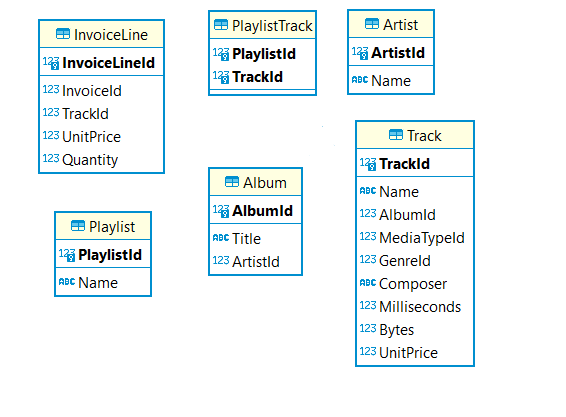

In [4]:
pd.read_sql('''SELECT Artist.name as Artist, Album.title as Album, Track.name as Track, InvoiceLine.UnitPrice as UnitPrice
           FROM Artist
           JOIN Album ON Artist.ArtistId = Album.ArtistId
           JOIN Track ON Album.AlbumId = Track.AlbumId
           JOIN InvoiceLine ON Track.TrackId = InvoiceLine.TrackId
           WHERE Artist.name = 'Aerosmith'
           ''', conn)

Artist     Album                Track  UnitPrice
0  Aerosmith  Big Ones  Love In An Elevator       0.99
1  Aerosmith  Big Ones    Janie's Got A Gun       0.99
2  Aerosmith  Big Ones      Deuces Are Wild       0.99
3  Aerosmith  Big Ones                Angel       0.99
4  Aerosmith  Big Ones             Rag Doll       0.99
5  Aerosmith  Big Ones            Blind Man       0.99
6  Aerosmith  Big Ones   Livin' On The Edge       0.99
7  Aerosmith  Big Ones        What It Takes       0.99
8  Aerosmith  Big Ones      Deuces Are Wild       0.99
9  Aerosmith  Big Ones              Amazing       0.99

Résultat attendu:

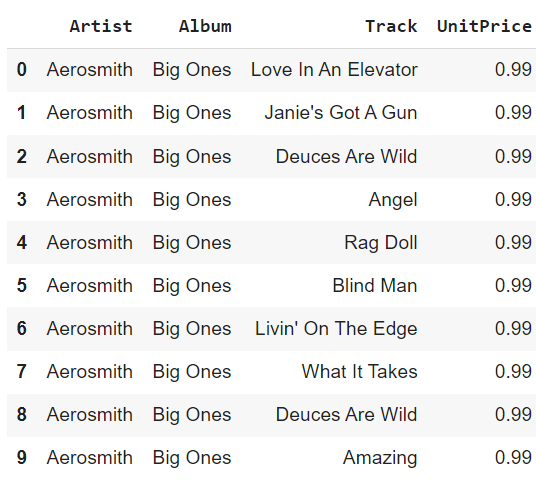

> 2. Toujours en se basant sur le schéma de la base de données, existe-t-il une table intermédiaire ? Si oui, quel est le nom de cette table ? Dans quelle situation est-il recommandé de créer une table intermédiaire pour connecter deux tables ?



_Réponse_:
Oui il existe une table intermédiaire qui s'appelle "PlaylistTrack". Il est utile de créer une table intermédiaire pour connecter deux tables lorsqu'il y a une relation many-to-many entre deux tables. Lorsqu'il y a une relation qui nécessite des informations supplémentaires qui ne peuvent pas être ajoutés directement aux tables existantes afin de stocker l'information.



Effectuer des requêtes, pour répondre aux questions suivantes.

> 3.1 Renvoyer le nombre de morceaux par artiste et par album, dans la même requête. Un artiste peut être représenté plusieurs fois, si plusieurs de ces albums sont représentés dans la base de données

Résultat attendu:



In [5]:
pd.read_sql('''SELECT Artist.name as Artist, Album.title as Album, COUNT(Album.AlbumId) as Number_of_songs
               FROM Artist
               JOIN Album ON Artist.ArtistId = Album.ArtistId
               JOIN Track ON Track.AlbumId = Album.AlbumId
               GROUP BY Album.title
''', conn)

Artist  \
0                                       Metallica   
1                                       Scorpions   
2       Aaron Copland & London Symphony Orchestra   
3                                     Iron Maiden   
4                                     Iron Maiden   
..                                            ...   
342                          Antônio Carlos Jobim   
343  Kent Nagano and Orchestre de l'Opéra de Lyon   
344                                Aaron Goldberg   
345                                            U2   
346      Terry Bozzio, Tony Levin & Steve Stevens   

                                                 Album  Number_of_songs  
0                               ...And Justice For All                9  
1    20th Century Masters - The Millennium Collecti...               12  
2                        A Copland Celebration, Vol. I                1  
3                           A Matter of Life and Death               11  
4                                      A Real Dead One               12  
..                                                 ...              ...  
342                                     Warner 25 Anos               14  
343                       Weill: The Seven Deadly Sins                1  
344                                             Worlds                1  
345                                            Zooropa               10  
346                        [1997] Black Light Syndrome                7  

[347 rows x 3 columns]

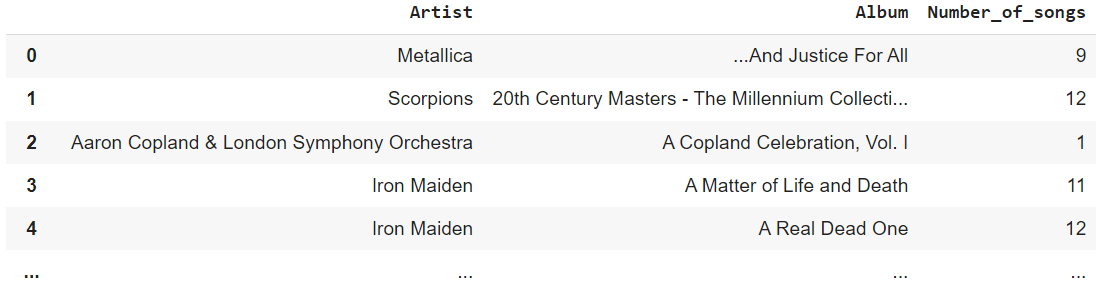

> 3.2 Quelles sont les 3 playlists qui contiennent le plus grand nombre d'artistes différents ? Les playlists qui portent le nom "Music" doivent être exclus.

In [6]:
pd.read_sql('''SELECT  COUNT(DISTINCT Album.ArtistId) as Number_of_artist, Playlist.Name
FROM Playlist
JOIN PlaylistTrack ON Playlist.PlaylistId = PlaylistTrack.PlaylistId
JOIN Track ON PlaylistTrack.TrackId = Track.TrackId
JOIN Album ON Track.AlbumId = Album.AlbumId
JOIN Artist ON Album.ArtistId = Artist.ArtistId
WHERE Playlist.Name NOT LIKE 'Music%'
GROUP BY Playlist.Name
ORDER BY Number_of_artist DESC
LIMIT 3;


 ''', conn)

Number_of_artist                        Name
0               109                  90’s Music
1                67                   Classical
2                25  Classical 101 - The Basics

Résultat attendu:  
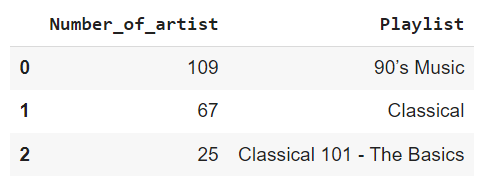

> 3.3. Quel artiste figure dans le plus grand nombre de playlists différentes ? On considère que les playlists qui portent le nom "Music" doivent être considérées comme une seule et même playlist.

In [7]:
pd.read_sql('''SELECT Artist.name as Artist, COUNT(DISTINCT Playlist.Name) AS Playlist_count
FROM Artist
JOIN Album ON Artist.ArtistId = Album.ArtistId
JOIN Track ON Album.AlbumId = Track.AlbumId
JOIN PlaylistTrack ON Track.TrackId = PlaylistTrack.TrackId
JOIN Playlist ON PlaylistTrack.PlaylistId = Playlist.PlaylistId
GROUP BY Artist.name
ORDER BY Playlist_count DESC
LIMIT 1;

 ''', conn)

Artist  Playlist_count
0  Eugene Ormandy               6

Résultat attendu:  
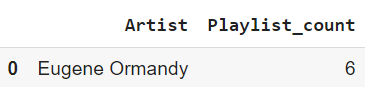

---

# Immobilier _(6 heures)_

## Pandas _(45 minutes)_

Voici un Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.
L'objectif de ce cas pratique est de répondre à plusieurs questions.

In [8]:
import pandas as pd

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_immobilieres_75.csv")

df_transactions

id_mutation  valeur_fonciere  surface_reelle_bati  prix_m2  \
0      2018-1404085         280000.0                   25    11200   
1      2018-1384130         110000.0                   12     9166   
2      2018-1376276          87950.0                    9     9772   
3      2018-1382007         699000.0                  111     6297   
4      2018-1376139         251000.0                   29     8655   
...             ...              ...                  ...      ...   
53180  2019-1082721         215000.0                   18    11944   
53181  2019-1102358         320905.0                   27    11885   
53182  2019-1102357         201000.0                   28     7178   
53183  2019-1082682         283650.0                   28    10130   
53184  2019-1100737         473000.0                   50     9460   

       nombre_pieces_principales   type_local               nom_commune  \
0                              2  appartement  Paris 20e Arrondissement   
1                              1  appartement  Paris 14e Arrondissement   
2                              1  appartement  Paris 11e Arrondissement   
3                              6  appartement  Paris 13e Arrondissement   
4                              2  appartement  Paris 12e Arrondissement   
...                          ...          ...                       ...   
53180                          1  appartement  Paris 15e Arrondissement   
53181                          1  appartement   Paris 4e Arrondissement   
53182                          1  appartement   Paris 2e Arrondissement   
53183                          1  appartement  Paris 15e Arrondissement   
53184                          2  appartement  Paris 20e Arrondissement   

                nom_iris  code_commune  code_departement  code_iris  \
0           Belleville 4         75120                75  751207704   
1         Montparnasse 4         75114                75  751145304   
2             Roquette 2         75111                75  751114302   
3      Maison Blanche 18         75113                75  751135118   
4               Picpus 5         75112                75  751124605   
...                  ...           ...               ...        ...   
53180    Saint-Lambert 4         75115                75  751155704   
53181    Saint-Gervais 3         75104                75  751041403   
53182   Bonne Nouvelle 2         75102                75  751020802   
53183    Saint-Lambert 9         75115                75  751155709   
53184        Charonne 14         75120                75  751208014   

         id_parcelles  longitude   latitude date_mutation  
0      75120000AL0064   2.389542  48.872300    2018-01-02  
1      75114000AM0068   2.326280  48.835690    2018-01-02  
2      75111000BS0234   2.386354  48.856080    2018-01-02  
3      75113000EI0007   2.343125  48.829746    2018-01-02  
4      75112000BS0026   2.396901  48.834740    2018-01-02  
...               ...        ...        ...           ...  
53180  75115000AO0027   2.297139  48.830433    2019-12-31  
53181  75104000AJ0091   2.357617  48.856890    2019-12-31  
53182  75102000AM0151   2.347458  48.865850    2019-12-31  
53183  75115000BH0015   2.290955  48.835120    2019-12-31  
53184  75120000DS0092   2.400628  48.852055    2019-12-31  

[53185 rows x 15 columns]

4. Nettoyer le jeu de données pour qu'il puisse être utilisé pour conseiller les ménages de classe moyenne en recherche de logement.  
Le code et un justificatif sur les choix devront être présentés pour la présentation orale.

## Traitement des données manquantes

In [9]:
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import plotly.express as px

In [10]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53185 entries, 0 to 53184
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_mutation                53185 non-null  object 
 1   valeur_fonciere            53185 non-null  float64
 2   surface_reelle_bati        53185 non-null  int64  
 3   prix_m2                    53185 non-null  int64  
 4   nombre_pieces_principales  53185 non-null  int64  
 5   type_local                 53185 non-null  object 
 6   nom_commune                53185 non-null  object 
 7   nom_iris                   53185 non-null  object 
 8   code_commune               53185 non-null  int64  
 9   code_departement           53185 non-null  int64  
 10  code_iris                  53185 non-null  int64  
 11  id_parcelles               53185 non-null  object 
 12  longitude                  53185 non-null  float64
 13  latitude                   53185 non-null  flo

In [11]:
missing_values = df_transactions.isnull().sum()
missing_percent = (missing_values / len(df_transactions)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

                           Missing Values  Percentage
id_mutation                             0         0.0
valeur_fonciere                         0         0.0
surface_reelle_bati                     0         0.0
prix_m2                                 0         0.0
nombre_pieces_principales               0         0.0
type_local                              0         0.0
nom_commune                             0         0.0
nom_iris                                0         0.0
code_commune                            0         0.0
code_departement                        0         0.0
code_iris                               0         0.0
id_parcelles                            0         0.0
longitude                               0         0.0
latitude                                0         0.0
date_mutation                           0         0.0


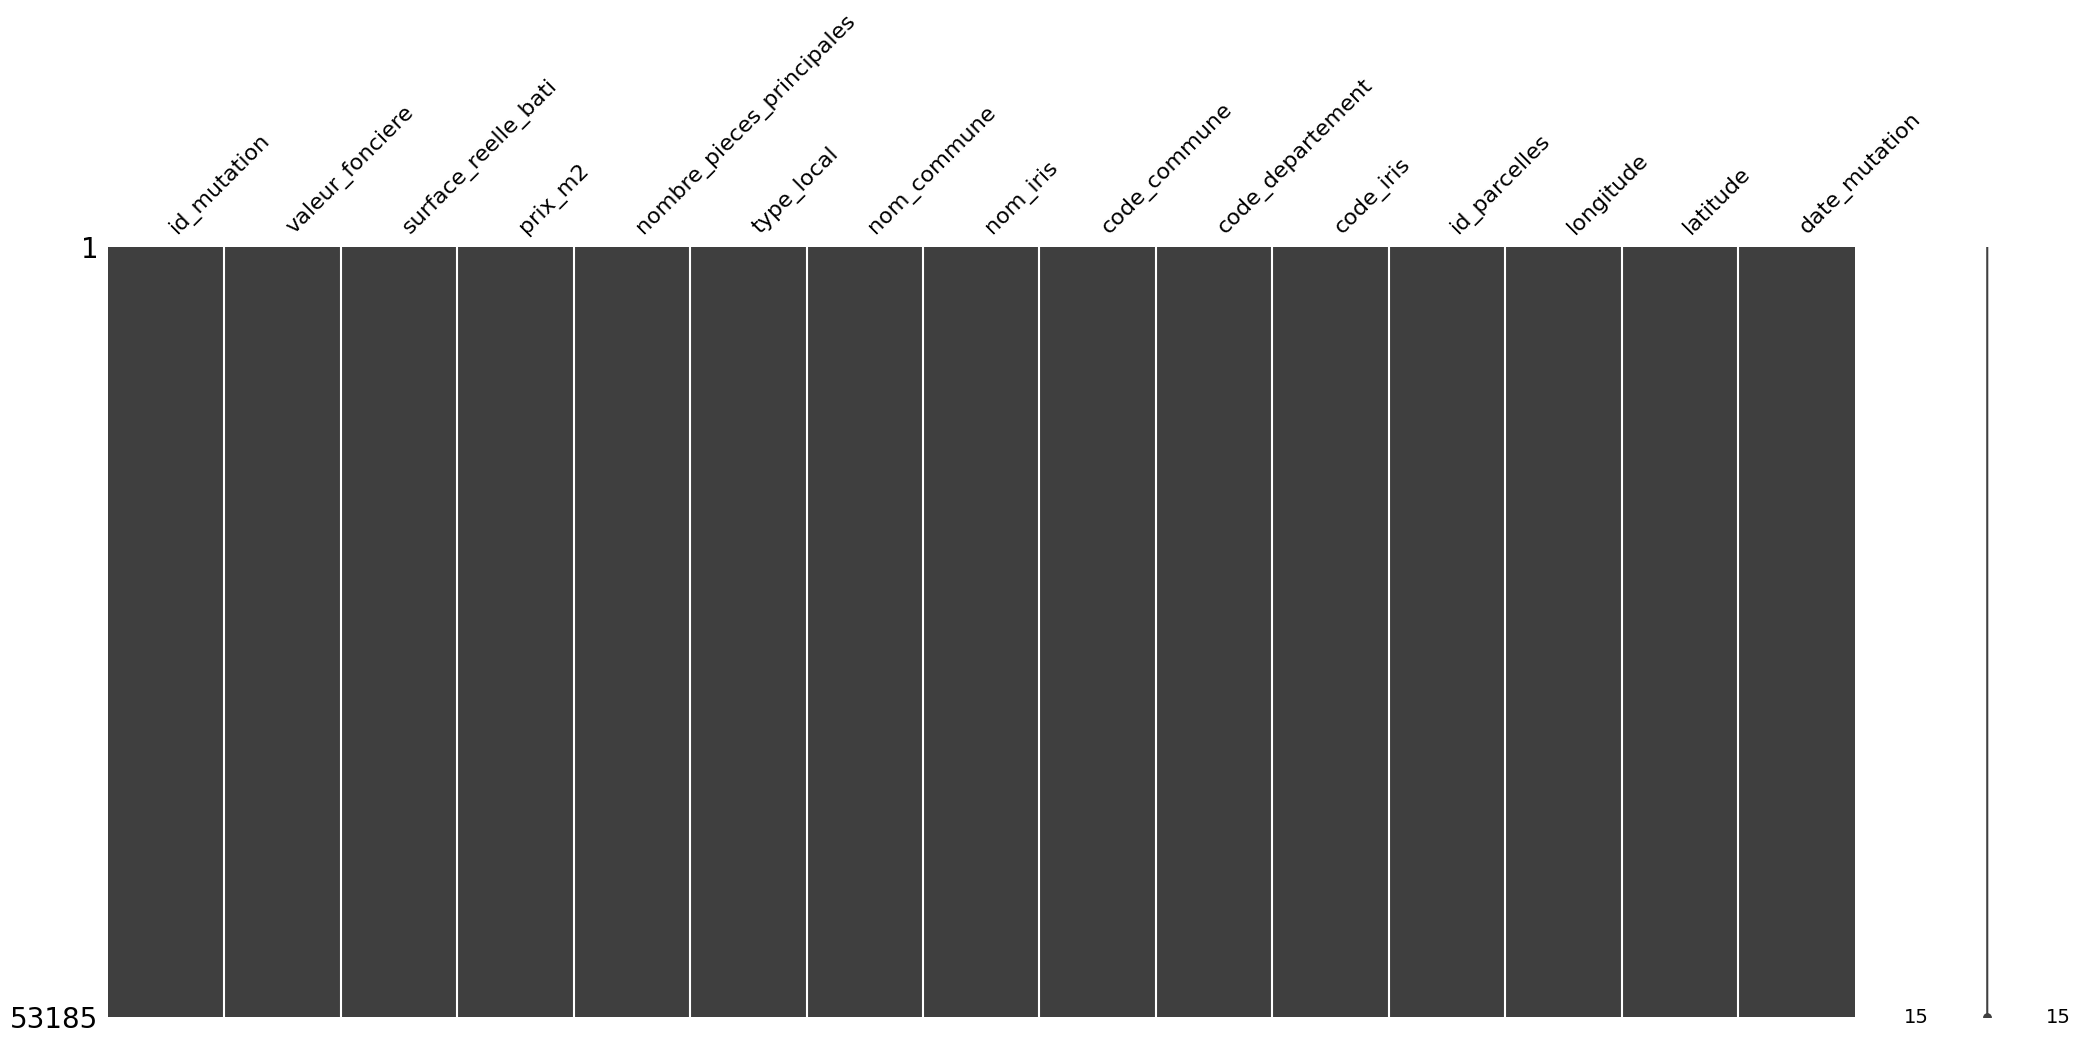

In [12]:
msno.matrix(df_transactions)
plt.show()

 Il y a 0 valeurs manquantes dans notre dataframe "df_transactions"

## TRAITEMENT DES DUPLICATES

In [13]:
print(f"nb valeur unique: {len(df_transactions['id_mutation'].unique())} / nb lignes : {df_transactions.shape[0]}")

nb valeur unique: 53185 / nb lignes : 53185


Il y a 0 duplicate dans notre dataframe "df_transactions"

## TRAITEMENT DES OUTLIERS

In [14]:
df_transactions.describe()

valeur_fonciere  surface_reelle_bati       prix_m2  \
count     5.318500e+04         53185.000000  53185.000000   
mean      5.364078e+05            53.905067   9924.790806   
std       1.321097e+06           120.036958   2899.611087   
min       1.000000e+04             1.000000   2000.000000   
25%       2.400000e+05            26.000000   8228.000000   
50%       3.741000e+05            40.000000   9736.000000   
75%       6.000000e+05            61.000000  11363.000000   
max       1.956000e+08         11887.000000  30000.000000   

       nombre_pieces_principales  code_commune  code_departement  \
count               53185.000000  53185.000000           53185.0   
mean                    2.081734  75113.236570              75.0   
std                     1.302880      5.075849               0.0   
min                     0.000000  75101.000000              75.0   
25%                     1.000000  75110.000000              75.0   
50%                     2.000000  75115.000000              75.0   
75%                     3.000000  75117.000000              75.0   
max                    23.000000  75120.000000              75.0   

          code_iris     longitude      latitude  
count  5.318500e+04  53185.000000  53185.000000  
mean   7.511375e+08      2.339065     48.863844  
std    5.277820e+04      0.036343      0.020007  
min    7.510101e+08      2.255896     48.819412  
25%    7.511038e+08      2.313028     48.847305  
50%    7.511557e+08      2.342309     48.865700  
75%    7.511768e+08      2.364893     48.881714  
max    7.512080e+08      2.412825     48.900566

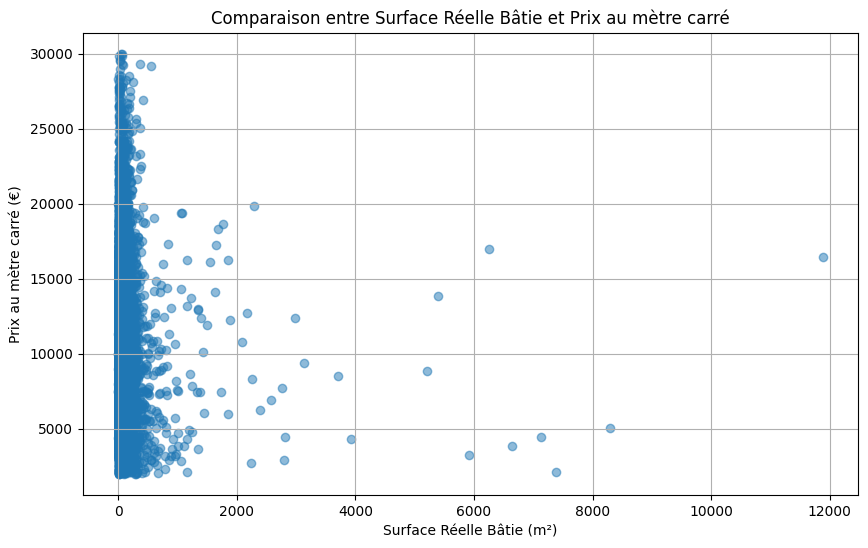

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df_transactions['surface_reelle_bati'], df_transactions['prix_m2'], alpha=0.5)

plt.title('Comparaison entre Surface Réelle Bâtie et Prix au mètre carré')
plt.xlabel('Surface Réelle Bâtie (m²)')
plt.ylabel('Prix au mètre carré (€)')
plt.grid(True)
plt.show()


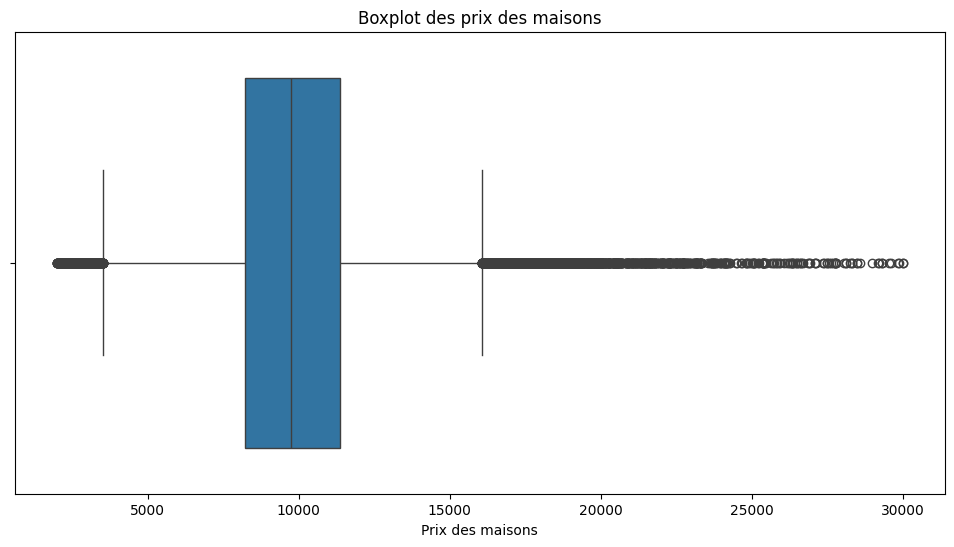

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_transactions, x='prix_m2')
plt.xlabel('Prix des maisons')
plt.title("Boxplot des prix des maisons")
plt.show()


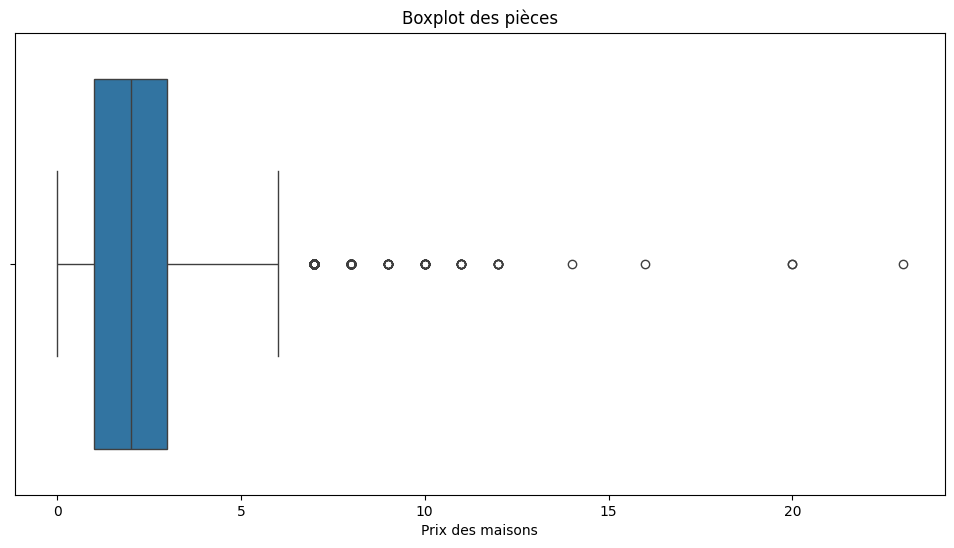

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_transactions, x='nombre_pieces_principales')
plt.xlabel('Prix des maisons')
plt.title("Boxplot des pièces")
plt.show()

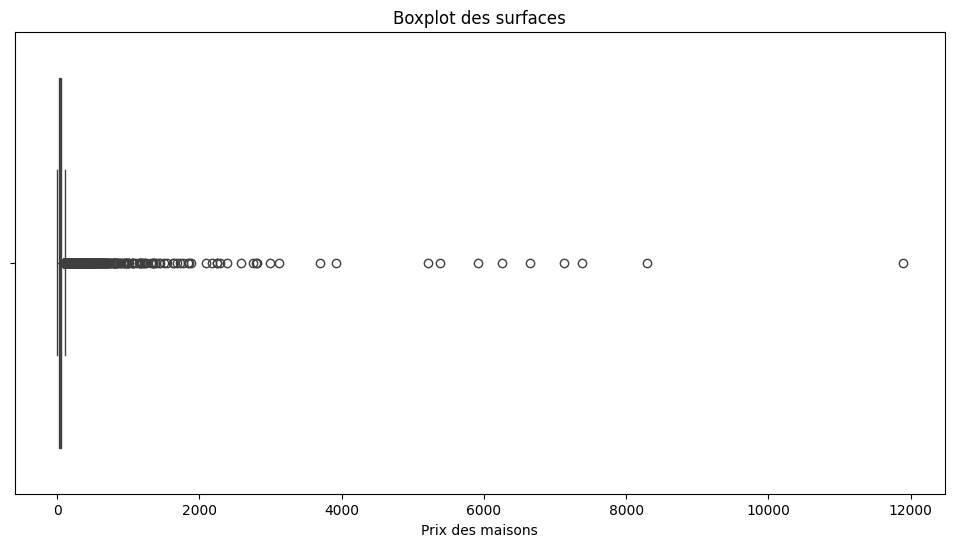

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_transactions, x='surface_reelle_bati')
plt.xlabel('Prix des maisons')
plt.title("Boxplot des surfaces")
plt.show()

## Les locaux industriels doivent être supprimés car ils ne correspondent pas aux besoins des ménages qui cherchent un logement.

In [19]:
df_transactions['type_local'].unique()

array(['appartement', 'local industriel', 'maison'], dtype=object)

In [20]:
df_transactions = df_transactions[df_transactions['type_local'] != 'local industriel']

In [21]:
df_transactions['type_local'].unique()

array(['appartement', 'maison'], dtype=object)

In [22]:
import numpy as np

df_numeric = df_transactions.select_dtypes(include=[np.number])

correlation_spearman = df_numeric.corr(method='spearman')

correlation_spearman

valeur_fonciere  surface_reelle_bati   prix_m2  \
valeur_fonciere                   1.000000             0.916628  0.411357   
surface_reelle_bati               0.916628             1.000000  0.065577   
prix_m2                           0.411357             0.065577  1.000000   
nombre_pieces_principales         0.787232             0.845059  0.088314   
code_commune                     -0.160521            -0.040445 -0.345396   
code_departement                       NaN                  NaN       NaN   
code_iris                        -0.164596            -0.043424 -0.348571   
longitude                        -0.221391            -0.160861 -0.221477   
latitude                         -0.058969            -0.031015 -0.075687   

                           nombre_pieces_principales  code_commune  \
valeur_fonciere                             0.787232     -0.160521   
surface_reelle_bati                         0.845059     -0.040445   
prix_m2                                     0.088314     -0.345396   
nombre_pieces_principales                   1.000000     -0.012698   
code_commune                               -0.012698      1.000000   
code_departement                                 NaN           NaN   
code_iris                                  -0.014011      0.996831   
longitude                                  -0.105502      0.024890   
latitude                                    0.010399      0.414484   

                           code_departement  code_iris  longitude  latitude  
valeur_fonciere                         NaN  -0.164596  -0.221391 -0.058969  
surface_reelle_bati                     NaN  -0.043424  -0.160861 -0.031015  
prix_m2                                 NaN  -0.348571  -0.221477 -0.075687  
nombre_pieces_principales               NaN  -0.014011  -0.105502  0.010399  
code_commune                            NaN   0.996831   0.024890  0.414484  
code_departement                        NaN        NaN        NaN       NaN  
code_iris                               NaN   1.000000   0.032654  0.419442  
longitude                               NaN   0.032654   1.000000  0.106846  
latitude                                NaN   0.419442   0.106846  1.000000

##Suppression des logements ayants une superficie de 9 m2 car la superficie habitable minimale d'un logement doit être d'au moins 9 mètres carrés pour une personne seule (loi Alur (Accès au Logement et Urbanisme Rénové))

In [23]:
df_transactions = df_transactions[(df_transactions['surface_reelle_bati'] >= 9) & (df_transactions['surface_reelle_bati'] < 840)]


In [24]:
df_transactions

id_mutation  valeur_fonciere  surface_reelle_bati  prix_m2  \
0      2018-1404085         280000.0                   25    11200   
1      2018-1384130         110000.0                   12     9166   
2      2018-1376276          87950.0                    9     9772   
3      2018-1382007         699000.0                  111     6297   
4      2018-1376139         251000.0                   29     8655   
...             ...              ...                  ...      ...   
53180  2019-1082721         215000.0                   18    11944   
53181  2019-1102358         320905.0                   27    11885   
53182  2019-1102357         201000.0                   28     7178   
53183  2019-1082682         283650.0                   28    10130   
53184  2019-1100737         473000.0                   50     9460   

       nombre_pieces_principales   type_local               nom_commune  \
0                              2  appartement  Paris 20e Arrondissement   
1                              1  appartement  Paris 14e Arrondissement   
2                              1  appartement  Paris 11e Arrondissement   
3                              6  appartement  Paris 13e Arrondissement   
4                              2  appartement  Paris 12e Arrondissement   
...                          ...          ...                       ...   
53180                          1  appartement  Paris 15e Arrondissement   
53181                          1  appartement   Paris 4e Arrondissement   
53182                          1  appartement   Paris 2e Arrondissement   
53183                          1  appartement  Paris 15e Arrondissement   
53184                          2  appartement  Paris 20e Arrondissement   

                nom_iris  code_commune  code_departement  code_iris  \
0           Belleville 4         75120                75  751207704   
1         Montparnasse 4         75114                75  751145304   
2             Roquette 2         75111                75  751114302   
3      Maison Blanche 18         75113                75  751135118   
4               Picpus 5         75112                75  751124605   
...                  ...           ...               ...        ...   
53180    Saint-Lambert 4         75115                75  751155704   
53181    Saint-Gervais 3         75104                75  751041403   
53182   Bonne Nouvelle 2         75102                75  751020802   
53183    Saint-Lambert 9         75115                75  751155709   
53184        Charonne 14         75120                75  751208014   

         id_parcelles  longitude   latitude date_mutation  
0      75120000AL0064   2.389542  48.872300    2018-01-02  
1      75114000AM0068   2.326280  48.835690    2018-01-02  
2      75111000BS0234   2.386354  48.856080    2018-01-02  
3      75113000EI0007   2.343125  48.829746    2018-01-02  
4      75112000BS0026   2.396901  48.834740    2018-01-02  
...               ...        ...        ...           ...  
53180  75115000AO0027   2.297139  48.830433    2019-12-31  
53181  75104000AJ0091   2.357617  48.856890    2019-12-31  
53182  75102000AM0151   2.347458  48.865850    2019-12-31  
53183  75115000BH0015   2.290955  48.835120    2019-12-31  
53184  75120000DS0092   2.400628  48.852055    2019-12-31  

[48809 rows x 15 columns]

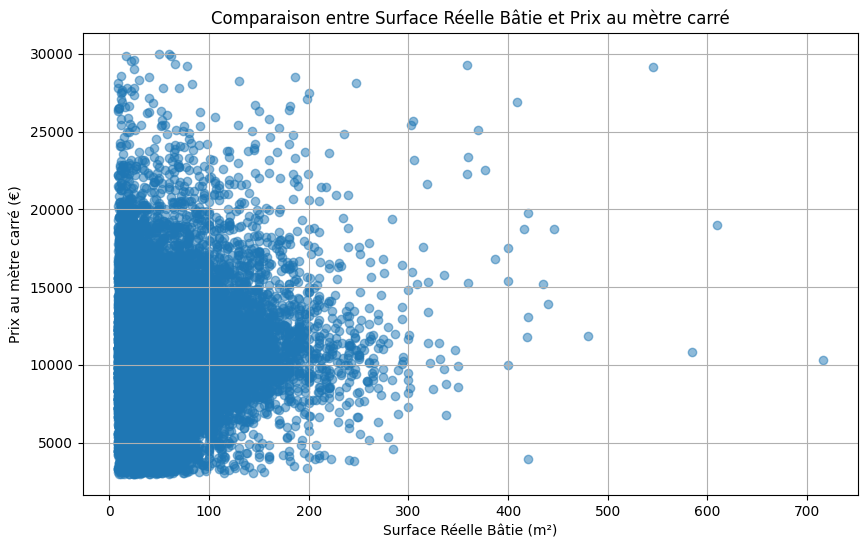

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df_transactions['surface_reelle_bati'], df_transactions['prix_m2'], alpha=0.5)

plt.title('Comparaison entre Surface Réelle Bâtie et Prix au mètre carré')
plt.xlabel('Surface Réelle Bâtie (m²)')
plt.ylabel('Prix au mètre carré (€)')
plt.grid(True)
plt.show()


## Suppression du nombre de pièces


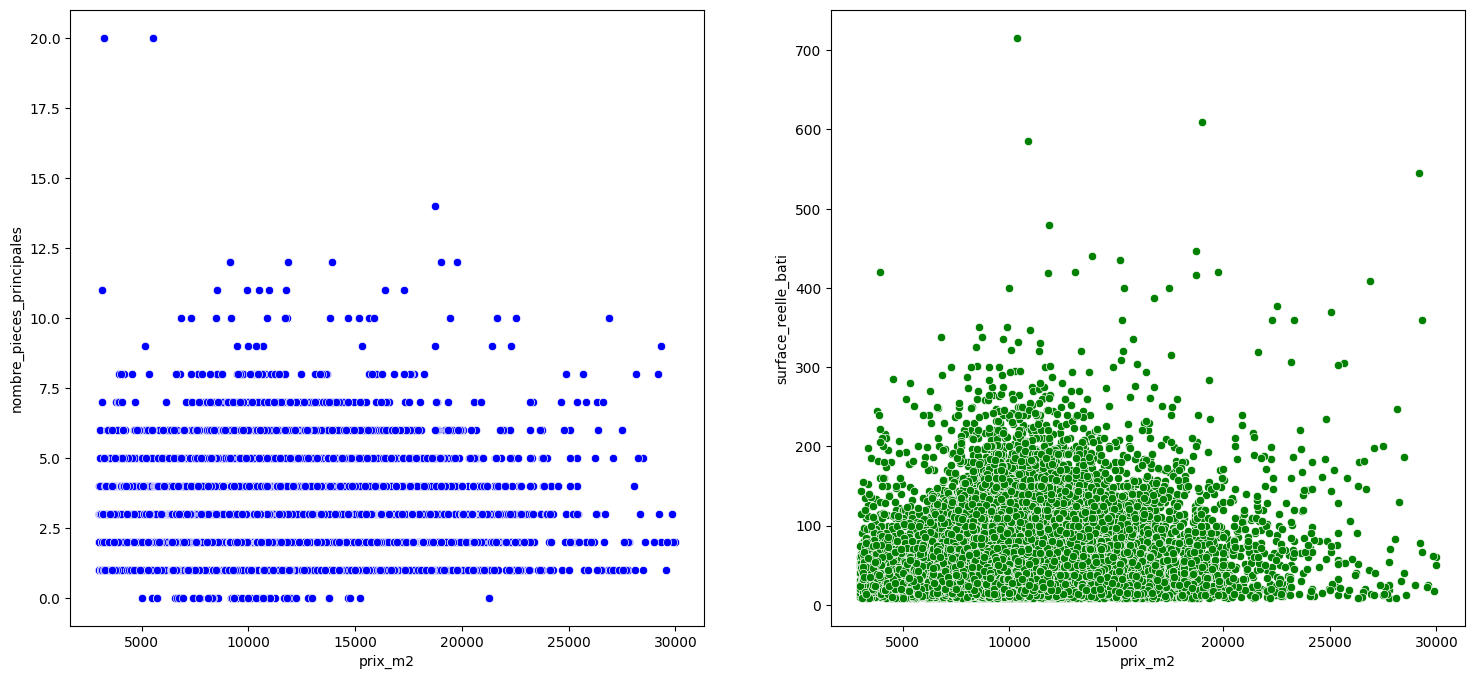

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

list_graphs = ['prix_m2']

for loop in range(len(list_graphs)):
    ax = sns.scatterplot(data=df_transactions.dropna(), x=list_graphs[loop], y='nombre_pieces_principales', color='blue', ax=axes[0])
    ax = sns.scatterplot(data=df_transactions.dropna(), x=list_graphs[loop], y='surface_reelle_bati', color='green', ax=axes[1])

plt.show()



In [27]:
df_transactions = df_transactions[(df_transactions['nombre_pieces_principales'] > 0) & (df_transactions['nombre_pieces_principales'] <= 6 )]

In [28]:
df_transactions['nombre_pieces_principales'].unique()

array([2, 1, 6, 3, 4, 5])

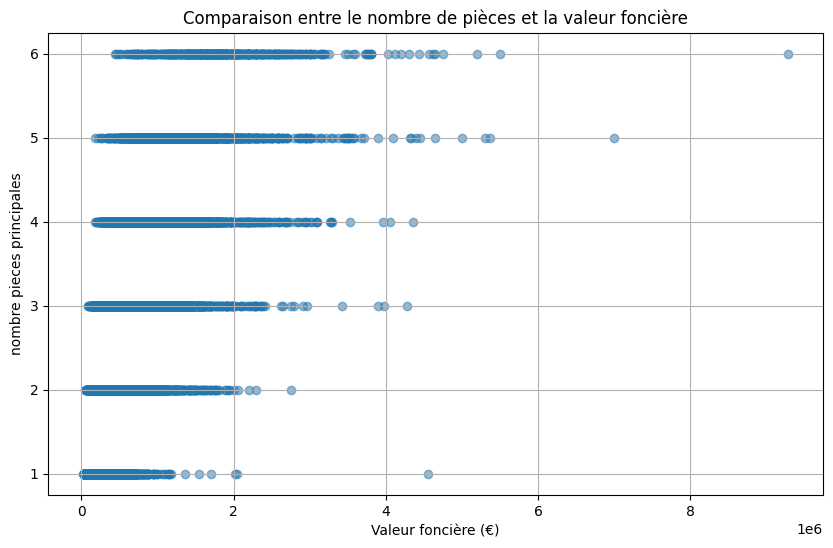

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df_transactions['valeur_fonciere'], df_transactions['nombre_pieces_principales'], alpha=0.5)

plt.title('Comparaison entre le nombre de pièces et la valeur foncière')
plt.xlabel('Valeur foncière (€)')
plt.ylabel('nombre pieces principales')
plt.grid(True)
plt.show()

## Suppression des appartements ayants un prix à plus de 800 000€ car :




1. Salaire moyen des cadres	5 729 € nets / mois
2. Salaire moyen des professions intermédiaires	2 997 € nets
3. Salaire moyen des employés	1 966 € nets

-------------------------------------------------

1. Salaire moyen des femmes	3 675 € nets / mois
2. Salaire moyen des hommes	4 594 € nets / mois

-------------------------------------------------

1. Salaire moyen des moins de 26 ans	1 992 € nets / mois
2. Salaire moyen des 26-49 ans	3 699 € nets / mois
3. Salaire moyen des 50 ans et plus	4 228 € nets / mois



In [30]:
df_transactions['valeur_fonciere'].unique

<bound method Series.unique of 0        280000.0
1        110000.0
2         87950.0
3        699000.0
4        251000.0
           ...   
53180    215000.0
53181    320905.0
53182    201000.0
53183    283650.0
53184    473000.0
Name: valeur_fonciere, Length: 48463, dtype: float64>

In [31]:
df_transactions = df_transactions[df_transactions['valeur_fonciere'] >= 0]


In [32]:
#df_transactions['valeur_fonciere'].unique

In [33]:
#df_transactions= df_transactions['valeur_fonciere'].astype(int)

In [34]:
df_transactions = df_transactions[df_transactions['valeur_fonciere'] <= 800000]

In [35]:
df_transactions

id_mutation  valeur_fonciere  surface_reelle_bati  prix_m2  \
0      2018-1404085         280000.0                   25    11200   
1      2018-1384130         110000.0                   12     9166   
2      2018-1376276          87950.0                    9     9772   
3      2018-1382007         699000.0                  111     6297   
4      2018-1376139         251000.0                   29     8655   
...             ...              ...                  ...      ...   
53180  2019-1082721         215000.0                   18    11944   
53181  2019-1102358         320905.0                   27    11885   
53182  2019-1102357         201000.0                   28     7178   
53183  2019-1082682         283650.0                   28    10130   
53184  2019-1100737         473000.0                   50     9460   

       nombre_pieces_principales   type_local               nom_commune  \
0                              2  appartement  Paris 20e Arrondissement   
1                              1  appartement  Paris 14e Arrondissement   
2                              1  appartement  Paris 11e Arrondissement   
3                              6  appartement  Paris 13e Arrondissement   
4                              2  appartement  Paris 12e Arrondissement   
...                          ...          ...                       ...   
53180                          1  appartement  Paris 15e Arrondissement   
53181                          1  appartement   Paris 4e Arrondissement   
53182                          1  appartement   Paris 2e Arrondissement   
53183                          1  appartement  Paris 15e Arrondissement   
53184                          2  appartement  Paris 20e Arrondissement   

                nom_iris  code_commune  code_departement  code_iris  \
0           Belleville 4         75120                75  751207704   
1         Montparnasse 4         75114                75  751145304   
2             Roquette 2         75111                75  751114302   
3      Maison Blanche 18         75113                75  751135118   
4               Picpus 5         75112                75  751124605   
...                  ...           ...               ...        ...   
53180    Saint-Lambert 4         75115                75  751155704   
53181    Saint-Gervais 3         75104                75  751041403   
53182   Bonne Nouvelle 2         75102                75  751020802   
53183    Saint-Lambert 9         75115                75  751155709   
53184        Charonne 14         75120                75  751208014   

         id_parcelles  longitude   latitude date_mutation  
0      75120000AL0064   2.389542  48.872300    2018-01-02  
1      75114000AM0068   2.326280  48.835690    2018-01-02  
2      75111000BS0234   2.386354  48.856080    2018-01-02  
3      75113000EI0007   2.343125  48.829746    2018-01-02  
4      75112000BS0026   2.396901  48.834740    2018-01-02  
...               ...        ...        ...           ...  
53180  75115000AO0027   2.297139  48.830433    2019-12-31  
53181  75104000AJ0091   2.357617  48.856890    2019-12-31  
53182  75102000AM0151   2.347458  48.865850    2019-12-31  
53183  75115000BH0015   2.290955  48.835120    2019-12-31  
53184  75120000DS0092   2.400628  48.852055    2019-12-31  

[41936 rows x 15 columns]

In [36]:
fig = px.scatter_mapbox(df_transactions,
                        lat = 'latitude',
                        lon = 'longitude',
                        color = 'code_commune',
                        size='valeur_fonciere',
                        size_max=20,
                        hover_data=['valeur_fonciere'],
                        hover_name='nom_commune'
                         )
fig.update_layout(mapbox_style='open-street-map',
                  mapbox_zoom=9,
                  mapbox_center ={'lat' : 48.863844, 'lon': 2.339065},
                  height = 800,
                  width = 1200)

fig.show()

> 5. En se référant au dataset de base, réaliser un classement croissant du prix moyen du mètre carré par arrondissememt, en se basant sur les transactions du dataset.

In [37]:
df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_immobilieres_75.csv")


In [38]:
df_transactions

id_mutation  valeur_fonciere  surface_reelle_bati  prix_m2  \
0      2018-1404085         280000.0                   25    11200   
1      2018-1384130         110000.0                   12     9166   
2      2018-1376276          87950.0                    9     9772   
3      2018-1382007         699000.0                  111     6297   
4      2018-1376139         251000.0                   29     8655   
...             ...              ...                  ...      ...   
53180  2019-1082721         215000.0                   18    11944   
53181  2019-1102358         320905.0                   27    11885   
53182  2019-1102357         201000.0                   28     7178   
53183  2019-1082682         283650.0                   28    10130   
53184  2019-1100737         473000.0                   50     9460   

       nombre_pieces_principales   type_local               nom_commune  \
0                              2  appartement  Paris 20e Arrondissement   
1                              1  appartement  Paris 14e Arrondissement   
2                              1  appartement  Paris 11e Arrondissement   
3                              6  appartement  Paris 13e Arrondissement   
4                              2  appartement  Paris 12e Arrondissement   
...                          ...          ...                       ...   
53180                          1  appartement  Paris 15e Arrondissement   
53181                          1  appartement   Paris 4e Arrondissement   
53182                          1  appartement   Paris 2e Arrondissement   
53183                          1  appartement  Paris 15e Arrondissement   
53184                          2  appartement  Paris 20e Arrondissement   

                nom_iris  code_commune  code_departement  code_iris  \
0           Belleville 4         75120                75  751207704   
1         Montparnasse 4         75114                75  751145304   
2             Roquette 2         75111                75  751114302   
3      Maison Blanche 18         75113                75  751135118   
4               Picpus 5         75112                75  751124605   
...                  ...           ...               ...        ...   
53180    Saint-Lambert 4         75115                75  751155704   
53181    Saint-Gervais 3         75104                75  751041403   
53182   Bonne Nouvelle 2         75102                75  751020802   
53183    Saint-Lambert 9         75115                75  751155709   
53184        Charonne 14         75120                75  751208014   

         id_parcelles  longitude   latitude date_mutation  
0      75120000AL0064   2.389542  48.872300    2018-01-02  
1      75114000AM0068   2.326280  48.835690    2018-01-02  
2      75111000BS0234   2.386354  48.856080    2018-01-02  
3      75113000EI0007   2.343125  48.829746    2018-01-02  
4      75112000BS0026   2.396901  48.834740    2018-01-02  
...               ...        ...        ...           ...  
53180  75115000AO0027   2.297139  48.830433    2019-12-31  
53181  75104000AJ0091   2.357617  48.856890    2019-12-31  
53182  75102000AM0151   2.347458  48.865850    2019-12-31  
53183  75115000BH0015   2.290955  48.835120    2019-12-31  
53184  75120000DS0092   2.400628  48.852055    2019-12-31  

[53185 rows x 15 columns]

In [39]:

prix_moyen_du_mètre = df_transactions.groupby('nom_commune')['prix_m2'].mean().sort_values()

print(prix_moyen_du_mètre)



nom_commune
Paris 19e Arrondissement     8263.085767
Paris 20e Arrondissement     8435.117577
Paris 12e Arrondissement     8911.448929
Paris 13e Arrondissement     8947.229176
Paris 18e Arrondissement     9028.116741
Paris 15e Arrondissement     9520.731622
Paris 11e Arrondissement     9574.427294
Paris 14e Arrondissement     9610.583299
Paris 10e Arrondissement     9612.903661
Paris 17e Arrondissement    10032.405395
Paris 9e Arrondissement     10365.010837
Paris 16e Arrondissement    10534.017112
Paris 2e Arrondissement     10700.097731
Paris 3e Arrondissement     11339.204961
Paris 8e Arrondissement     11410.844461
Paris 5e Arrondissement     11436.692626
Paris 1er Arrondissement    12050.998605
Paris 4e Arrondissement     12699.096525
Paris 7e Arrondissement     13170.340283
Paris 6e Arrondissement     13646.275534
Name: prix_m2, dtype: float64


> 6. Un couple vient vivre à Paris et aimerait acheter un logement.  Ils ne connaissent absolument pas la ville de Paris, mais ont quelques critères et préférences, que voici ci-dessous.
- Budget Max : 450 000 euros
- Idéalement, nature à proximité
- Environnement assez calme

Faire une recommandation au couple, en vous basant sur l'historique de transactions du dataset. Votre recommandation permettra au couple d'avoir une idée assez précise du lieu qui pourrait à la fois leur convenir et rentrer dans leur budget.

In [40]:
## Logement entrant dans le budget du client
budget_max = 450000
logement = df_transactions[df_transactions['valeur_fonciere'] <= budget_max]

In [41]:
logement

id_mutation  valeur_fonciere  surface_reelle_bati  prix_m2  \
0      2018-1404085         280000.0                   25    11200   
1      2018-1384130         110000.0                   12     9166   
2      2018-1376276          87950.0                    9     9772   
4      2018-1376139         251000.0                   29     8655   
5      2018-1399368         140000.0                   22     6363   
...             ...              ...                  ...      ...   
53179  2019-1090952         180000.0                   33     5454   
53180  2019-1082721         215000.0                   18    11944   
53181  2019-1102358         320905.0                   27    11885   
53182  2019-1102357         201000.0                   28     7178   
53183  2019-1082682         283650.0                   28    10130   

       nombre_pieces_principales        type_local               nom_commune  \
0                              2       appartement  Paris 20e Arrondissement   
1                              1       appartement  Paris 14e Arrondissement   
2                              1       appartement  Paris 11e Arrondissement   
4                              2       appartement  Paris 12e Arrondissement   
5                              1       appartement  Paris 18e Arrondissement   
...                          ...               ...                       ...   
53179                          0  local industriel  Paris 17e Arrondissement   
53180                          1       appartement  Paris 15e Arrondissement   
53181                          1       appartement   Paris 4e Arrondissement   
53182                          1       appartement   Paris 2e Arrondissement   
53183                          1       appartement  Paris 15e Arrondissement   

                   nom_iris  code_commune  code_departement  code_iris  \
0              Belleville 4         75120                75  751207704   
1            Montparnasse 4         75114                75  751145304   
2                Roquette 2         75111                75  751114302   
4                  Picpus 5         75112                75  751124605   
5      Grandes Carrieres 20         75118                75  751186920   
...                     ...           ...               ...        ...   
53179        Batignolles 13         75117                75  751176713   
53180       Saint-Lambert 4         75115                75  751155704   
53181       Saint-Gervais 3         75104                75  751041403   
53182      Bonne Nouvelle 2         75102                75  751020802   
53183       Saint-Lambert 9         75115                75  751155709   

         id_parcelles  longitude   latitude date_mutation  
0      75120000AL0064   2.389542  48.872300    2018-01-02  
1      75114000AM0068   2.326280  48.835690    2018-01-02  
2      75111000BS0234   2.386354  48.856080    2018-01-02  
4      75112000BS0026   2.396901  48.834740    2018-01-02  
5      75118000AY0066   2.340625  48.896687    2018-01-02  
...               ...        ...        ...           ...  
53179  75117000CS0101   2.317923  48.888615    2019-12-31  
53180  75115000AO0027   2.297139  48.830433    2019-12-31  
53181  75104000AJ0091   2.357617  48.856890    2019-12-31  
53182  75102000AM0151   2.347458  48.865850    2019-12-31  
53183  75115000BH0015   2.290955  48.835120    2019-12-31  

[32540 rows x 15 columns]

In [42]:
# prix_moyen_du_mètre = df_transactions.groupby('nom_commune')['prix_m2'].mean().sort_values()

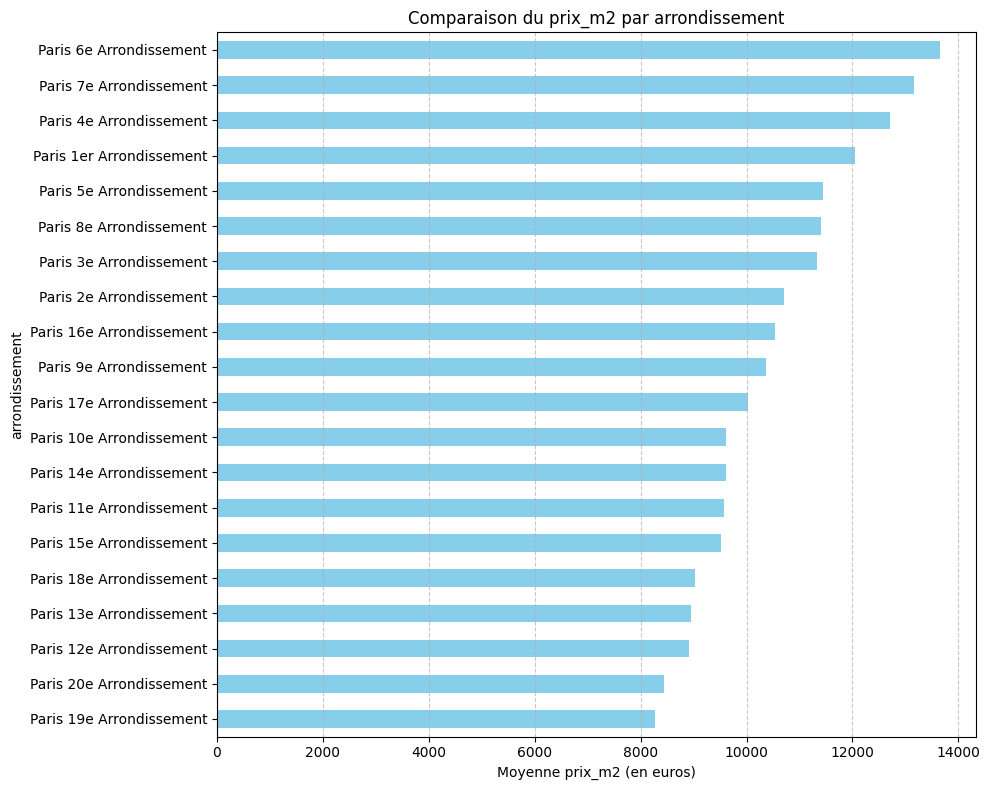

In [43]:
plt.figure(figsize=(10, 8))
prix_moyen_du_mètre.plot(kind='barh', color='skyblue')
plt.xlabel('Moyenne prix_m2 (en euros)')
plt.ylabel('arrondissement')
plt.title('Comparaison du prix_m2 par arrondissement')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

In [44]:
moyenne_par_commune = df_transactions.groupby('nom_commune')['valeur_fonciere'].mean().sort_values()

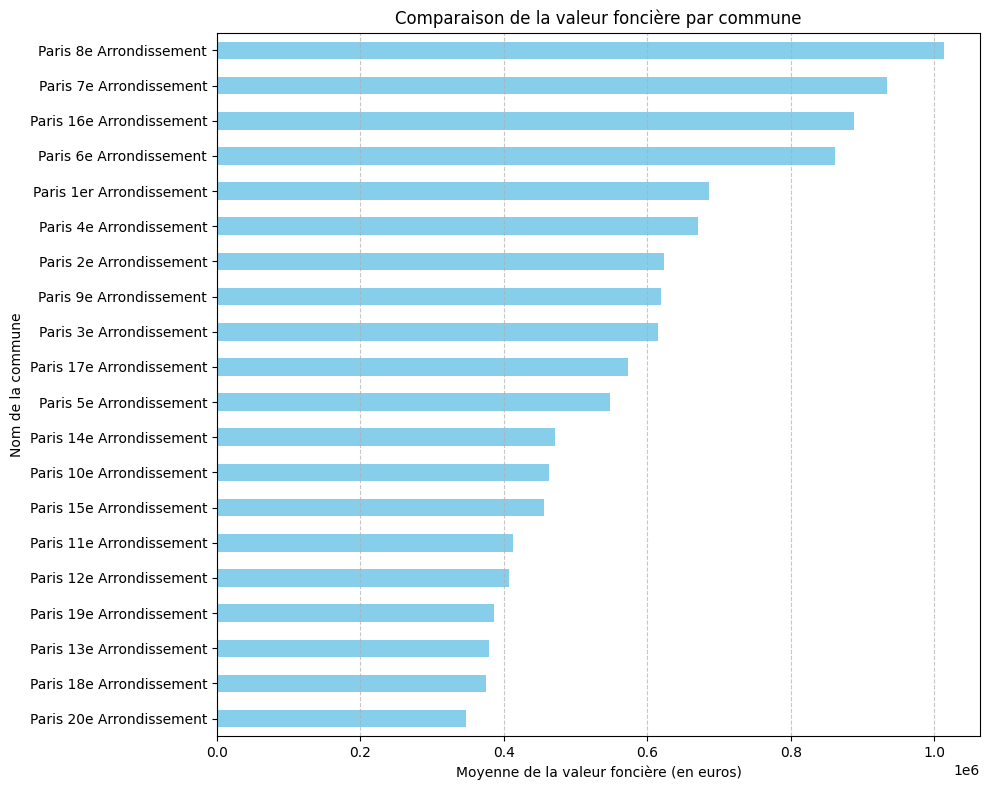

In [45]:
plt.figure(figsize=(10, 8))
moyenne_par_commune.plot(kind='barh', color='skyblue')
plt.xlabel('Moyenne de la valeur foncière (en euros)')
plt.ylabel('Nom de la commune')
plt.title('Comparaison de la valeur foncière par commune')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

In [46]:
moyenne_par_arrondissement = logement.groupby(['nom_commune', pd.to_datetime(logement['date_mutation']).dt.year])['valeur_fonciere'].mean()
moyenne_par_arrondissement


nom_commune               date_mutation
Paris 10e Arrondissement  2018             256601.950030
                          2019             264526.263979
Paris 11e Arrondissement  2018             263141.314778
                          2019             271546.226883
Paris 12e Arrondissement  2018             272505.400943
                          2019             268037.357322
Paris 13e Arrondissement  2018             264711.037511
                          2019             280205.087128
Paris 14e Arrondissement  2018             270054.471028
                          2019             279695.196403
Paris 15e Arrondissement  2018             273255.548633
                          2019             280687.946172
Paris 16e Arrondissement  2018             279486.028588
                          2019             284221.894497
Paris 17e Arrondissement  2018             267416.862346
                          2019             270523.069811
Paris 18e Arrondissement  2018             25191

In [47]:
# Arrondissements à considérer
arrondissements_interesses = [14, 15, 20, 12]

In [48]:
fig = px.scatter_mapbox(logement,
                        lat = 'latitude',
                        lon = 'longitude',
                        color = 'nom_commune',
                        size='valeur_fonciere',
                        size_max=6,
                        hover_name='nom_commune'
                         )
fig.update_layout(mapbox_style='open-street-map',
                  mapbox_zoom=9,
                  mapbox_center ={'lat' : 48.863844, 'lon': 2.339065},
                  height = 800,
                  width = 1200)

fig.show()

---

## API, Regex & RGPD _(1 heure)_

Voici les données de géolocalisation d'un appartement vendu en 2018. L'objectif est de retrouver l'adresse de cet appartement à partir des coordonnées de géolocalisation ("latitude", "longitude"), grâce à une API.

In [49]:
latitude_appartement = 48.895622
longitude_appartement = 2.337501

> 7. Utiliser une API (de votre choix) pour récupérer l' adresse de l'appartement, en utilisant les variables "latitude_appartement" et "longitude_appartement".


In [50]:
import requests
import json
import pprint

In [51]:
url =  'https://api-adresse.data.gouv.fr/reverse/?lat=48.895622&lon=2.337501'

user_agent = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.2 Safari/605.1.1'}

In [52]:
r_main = requests.get(url,
                      headers= user_agent)



if r_main.status_code == 200:
    print('ok!')
else:
    print(r_main.status_code)

ok!


In [53]:
data = json.loads(r_main.text)

pprint.pprint(data)

{'attribution': 'BAN',
 'center': [2.337501, 48.895622],
 'features': [{'geometry': {'coordinates': [2.337614, 48.895555],
                            'type': 'Point'},
               'properties': {'city': 'Paris',
                              'citycode': '75118',
                              'context': '75, Paris, Île-de-France',
                              'distance': 11,
                              'district': 'Paris 18e Arrondissement',
                              'housenumber': '111',
                              'id': '75118_2534_00111',
                              'importance': 0.80463,
                              'label': '111 Rue Damrémont 75018 Paris',
                              'name': '111 Rue Damrémont',
                              'postcode': '75018',
                              'score': 0.9999999505653318,
                              'street': 'Rue Damrémont',
                              'type': 'housenumber',
                              'x': 6

In [54]:
data['features'][0]['properties']['label']

'111 Rue Damrémont 75018 Paris'

> 8. Utiliser la librairie `re` (Regular Expression) pour extraire le code postal de l'adresse ci-dessous:

In [55]:
import re

In [56]:
adresse = "8 Passage Petit Cerf 75017 Paris"


In [57]:
code_postal = re.findall('[0-9]{5}', adresse)
code_postal

print(f'Le code postal de l\'adresse est : {code_postal[0]}')

Le code postal de l'adresse est : 75017


> 9. Dans le cadre du RGPD, est-ce que l'extraction du résultat à la question 8 dans une base de données représente une atteinte au RGPD ? Développez votre réponse en précisant dans quel(s) cas il est autorisé d'exploiter des données privées ?



_Réponse_:  



---

## Web Scraping _(15 minutes)_



> 10. Votre collègue de bureau à qui vous avez partagé le DataFrame `df_transactions` souhaite récupérer un descriptif de texte pour chaque arrondissement. C'est sa mission, pas la vôtre, donc vous allez vous contenter de répondre à sa question.
Votre collègue aimerait savoir si sa requête lui a permis d'avoir du contenu en retour.
Dans un cas, le code `response` lui renvoie "<Response [200]>", et dans l'autre cas, le code `response` lui renvoie "<Response [404]>".
Il ne comprend pas, et aimerait que vous lui expliquer ce que signifie chacune des deux réponses.
Soyez le plus clair possible, et écrivez votre réponse comme vous l'auriez expliqué à l'oral.

Réponse:  La réponse [200] renvoie au succès de la requête. C'est à dire que le site qu'il souhaite webscrapper lui donne l'autorisation.
La réponse [400] renvoie à une erreur. La page n'a pas été trouvé sur le serveur. Cela peut être du à plusieurs raisons :
  - la page a été supprimée.
  - La page a été déplacée vers une nouvelle URL et la redirection n'a pas été configurée correctement.
  - Il y a une erreur dans l'URL saisie.
  - Le  serveur est temporairement indisponible ou rencontre des problèmes techniques
  



---

## Machine Learning _(4 heures)_

Voici un nouveau Dataset `df_transactions_ml` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.
Utiliser ce Dataset pour répondre aux questions de la partie Machine Learning. _(30 minutes)_

In [58]:
df_transactions_ml = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_immobilieres_75.csv")

df_transactions_ml.head(2)

id_mutation  valeur_fonciere  surface_reelle_bati  prix_m2  \
0  2018-1404085         280000.0                   25    11200   
1  2018-1384130         110000.0                   12     9166   

   nombre_pieces_principales   type_local               nom_commune  \
0                          2  appartement  Paris 20e Arrondissement   
1                          1  appartement  Paris 14e Arrondissement   

         nom_iris  code_commune  code_departement  code_iris    id_parcelles  \
0    Belleville 4         75120                75  751207704  75120000AL0064   
1  Montparnasse 4         75114                75  751145304  75114000AM0068   

   longitude  latitude date_mutation  
0   2.389542  48.87230    2018-01-02  
1   2.326280  48.83569    2018-01-02

In [59]:
df_transactions_ml

id_mutation  valeur_fonciere  surface_reelle_bati  prix_m2  \
0      2018-1404085         280000.0                   25    11200   
1      2018-1384130         110000.0                   12     9166   
2      2018-1376276          87950.0                    9     9772   
3      2018-1382007         699000.0                  111     6297   
4      2018-1376139         251000.0                   29     8655   
...             ...              ...                  ...      ...   
53180  2019-1082721         215000.0                   18    11944   
53181  2019-1102358         320905.0                   27    11885   
53182  2019-1102357         201000.0                   28     7178   
53183  2019-1082682         283650.0                   28    10130   
53184  2019-1100737         473000.0                   50     9460   

       nombre_pieces_principales   type_local               nom_commune  \
0                              2  appartement  Paris 20e Arrondissement   
1                              1  appartement  Paris 14e Arrondissement   
2                              1  appartement  Paris 11e Arrondissement   
3                              6  appartement  Paris 13e Arrondissement   
4                              2  appartement  Paris 12e Arrondissement   
...                          ...          ...                       ...   
53180                          1  appartement  Paris 15e Arrondissement   
53181                          1  appartement   Paris 4e Arrondissement   
53182                          1  appartement   Paris 2e Arrondissement   
53183                          1  appartement  Paris 15e Arrondissement   
53184                          2  appartement  Paris 20e Arrondissement   

                nom_iris  code_commune  code_departement  code_iris  \
0           Belleville 4         75120                75  751207704   
1         Montparnasse 4         75114                75  751145304   
2             Roquette 2         75111                75  751114302   
3      Maison Blanche 18         75113                75  751135118   
4               Picpus 5         75112                75  751124605   
...                  ...           ...               ...        ...   
53180    Saint-Lambert 4         75115                75  751155704   
53181    Saint-Gervais 3         75104                75  751041403   
53182   Bonne Nouvelle 2         75102                75  751020802   
53183    Saint-Lambert 9         75115                75  751155709   
53184        Charonne 14         75120                75  751208014   

         id_parcelles  longitude   latitude date_mutation  
0      75120000AL0064   2.389542  48.872300    2018-01-02  
1      75114000AM0068   2.326280  48.835690    2018-01-02  
2      75111000BS0234   2.386354  48.856080    2018-01-02  
3      75113000EI0007   2.343125  48.829746    2018-01-02  
4      75112000BS0026   2.396901  48.834740    2018-01-02  
...               ...        ...        ...           ...  
53180  75115000AO0027   2.297139  48.830433    2019-12-31  
53181  75104000AJ0091   2.357617  48.856890    2019-12-31  
53182  75102000AM0151   2.347458  48.865850    2019-12-31  
53183  75115000BH0015   2.290955  48.835120    2019-12-31  
53184  75120000DS0092   2.400628  48.852055    2019-12-31  

[53185 rows x 15 columns]

> 11. On souhaite créer un algorithme capable de prédire le prix d'appartements, pour la ville de Paris.
Dans un premier temps, créer un nouveau DataFrame `df_flats` qui ne regroupe que les appartements. Combien de lignes contient `df_flats` ?

In [60]:
df_transactions_ml['type_local'].unique()

array(['appartement', 'local industriel', 'maison'], dtype=object)

In [61]:
df_flats = df_transactions_ml[df_transactions_ml['type_local'] == 'appartement']

In [62]:
df_flats

id_mutation  valeur_fonciere  surface_reelle_bati  prix_m2  \
0      2018-1404085         280000.0                   25    11200   
1      2018-1384130         110000.0                   12     9166   
2      2018-1376276          87950.0                    9     9772   
3      2018-1382007         699000.0                  111     6297   
4      2018-1376139         251000.0                   29     8655   
...             ...              ...                  ...      ...   
53180  2019-1082721         215000.0                   18    11944   
53181  2019-1102358         320905.0                   27    11885   
53182  2019-1102357         201000.0                   28     7178   
53183  2019-1082682         283650.0                   28    10130   
53184  2019-1100737         473000.0                   50     9460   

       nombre_pieces_principales   type_local               nom_commune  \
0                              2  appartement  Paris 20e Arrondissement   
1                              1  appartement  Paris 14e Arrondissement   
2                              1  appartement  Paris 11e Arrondissement   
3                              6  appartement  Paris 13e Arrondissement   
4                              2  appartement  Paris 12e Arrondissement   
...                          ...          ...                       ...   
53180                          1  appartement  Paris 15e Arrondissement   
53181                          1  appartement   Paris 4e Arrondissement   
53182                          1  appartement   Paris 2e Arrondissement   
53183                          1  appartement  Paris 15e Arrondissement   
53184                          2  appartement  Paris 20e Arrondissement   

                nom_iris  code_commune  code_departement  code_iris  \
0           Belleville 4         75120                75  751207704   
1         Montparnasse 4         75114                75  751145304   
2             Roquette 2         75111                75  751114302   
3      Maison Blanche 18         75113                75  751135118   
4               Picpus 5         75112                75  751124605   
...                  ...           ...               ...        ...   
53180    Saint-Lambert 4         75115                75  751155704   
53181    Saint-Gervais 3         75104                75  751041403   
53182   Bonne Nouvelle 2         75102                75  751020802   
53183    Saint-Lambert 9         75115                75  751155709   
53184        Charonne 14         75120                75  751208014   

         id_parcelles  longitude   latitude date_mutation  
0      75120000AL0064   2.389542  48.872300    2018-01-02  
1      75114000AM0068   2.326280  48.835690    2018-01-02  
2      75111000BS0234   2.386354  48.856080    2018-01-02  
3      75113000EI0007   2.343125  48.829746    2018-01-02  
4      75112000BS0026   2.396901  48.834740    2018-01-02  
...               ...        ...        ...           ...  
53180  75115000AO0027   2.297139  48.830433    2019-12-31  
53181  75104000AJ0091   2.357617  48.856890    2019-12-31  
53182  75102000AM0151   2.347458  48.865850    2019-12-31  
53183  75115000BH0015   2.290955  48.835120    2019-12-31  
53184  75120000DS0092   2.400628  48.852055    2019-12-31  

[48921 rows x 15 columns]

12. Vous allez maintenant faire des choix concernant les variables du jeu de données à préserver. Expliquez votre méthode/réflexion, ainsi que les colonnes choisis.

In [63]:
df_numeric = df_flats.select_dtypes(include=[np.number])

correlation_spearman = df_numeric.corr(method='spearman')

correlation_spearman

valeur_fonciere  surface_reelle_bati   prix_m2  \
valeur_fonciere                   1.000000             0.915885  0.408530   
surface_reelle_bati               0.915885             1.000000  0.060560   
prix_m2                           0.408530             0.060560  1.000000   
nombre_pieces_principales         0.785145             0.843591  0.083291   
code_commune                     -0.165355            -0.044135 -0.349227   
code_departement                       NaN                  NaN       NaN   
code_iris                        -0.169374            -0.047047 -0.352404   
longitude                        -0.222529            -0.161231 -0.222017   
latitude                         -0.057450            -0.029488 -0.075038   

                           nombre_pieces_principales  code_commune  \
valeur_fonciere                             0.785145     -0.165355   
surface_reelle_bati                         0.843591     -0.044135   
prix_m2                                     0.083291     -0.349227   
nombre_pieces_principales                   1.000000     -0.016151   
code_commune                               -0.016151      1.000000   
code_departement                                 NaN           NaN   
code_iris                                  -0.017376      0.996824   
longitude                                  -0.105568      0.022364   
latitude                                    0.012585      0.414221   

                           code_departement  code_iris  longitude  latitude  
valeur_fonciere                         NaN  -0.169374  -0.222529 -0.057450  
surface_reelle_bati                     NaN  -0.047047  -0.161231 -0.029488  
prix_m2                                 NaN  -0.352404  -0.222017 -0.075038  
nombre_pieces_principales               NaN  -0.017376  -0.105568  0.012585  
code_commune                            NaN   0.996824   0.022364  0.414221  
code_departement                        NaN        NaN        NaN       NaN  
code_iris                               NaN   1.000000   0.030190  0.419146  
longitude                               NaN   0.030190   1.000000  0.105453  
latitude                                NaN   0.419146   0.105453  1.000000

<ipython-input-64-146fc3459cea>:1: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



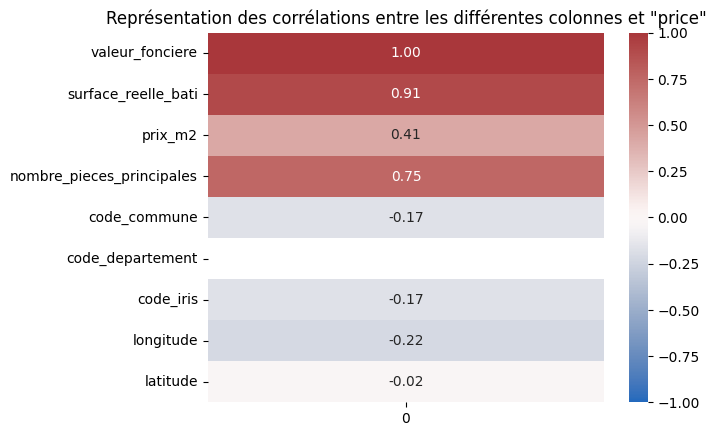

In [64]:
corr_matrix = df_flats.corrwith(df_flats['valeur_fonciere'])
sns.heatmap(corr_matrix.to_frame(), annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, cmap='vlag')
plt.title('Représentation des corrélations entre les différentes colonnes et "price"')
plt.show()

Réponse : les colonnes que je souhaite garder sont:  [`valeur_fonciere`, `surface_reelle_bati`, `nombre_pieces_principales`, `code_commune` et `type_local`] pour le DataFrame `df_flats`.

---------------------------------------------

* J'ai choisis ces colonnes là car elles me paraissent toutes pertinentes. Notamment au niveau de la correlation de matrice, elles ont une corrélation positive forte par rapport à la valeur_foncière. La valeur_foncière est importante, car elle représente le prix de vente du bien immobilier. Dans le cas de la régression linéaire, elle est la variable ma "Target" car c'est avec cette valeur que je vais chercher à prédire le prix.

---------------------------------------------

* La surface réelle bâtie d'un bien immobilier est un facteur important pour déterminer son prix (comme on peut le voir sur ma matrice de corrélation), car les biens avec une plus grande surface tendent généralement à avoir un prix plus élevé.

---------------------------------------------

* Le nombre de pièces principales dans un bien immobilier peut être un indicateur important. Cette variable peut expliquer les variations de prix en fonction de la taille du bien. (Deuxième plus forte corrélation dans la matrice de corrélation)

---------------------------------------------

* La colonne "code_commune" contient des valeurs discrètes qui représentent les arrondissements. Cela en fait une variable catégorielle qui m'aidera dans la comparaison et la précision des prix immobiliers entre les différents arrondissements.

---------------------------------------------

* Le type_local contient des valeurs qualitatives. Cette variable peut être utilisée pour créer des catégories de biens (par exemple, appartement, maison), ce qui permettrait de réaliser une classification des biens immobiliers en fonction de leur type.

In [71]:
df_flats = df_flats.drop(columns=['nom_commune', 'nom_iris', 'code_departement', 'code_iris', 'id_parcelles', 'longitude', 'latitude', 'date_mutation'])

KeyError: "['nom_commune', 'nom_iris', 'code_departement', 'code_iris', 'id_parcelles', 'longitude', 'latitude', 'date_mutation'] not found in axis"

### Partie Machine Learning - Regression _(1 heure 45 minutes)_

> 13. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire le prix d'appartements.  
- `X` est composé des variables que vous avez choisi plus haut.  
- `y` est la variable `valeur_fonciere`.


In [65]:
X = df_flats.drop(columns= 'valeur_fonciere')
y = df_flats['valeur_fonciere']

> 14. Séparer les données en jeu d'entraînement et jeu de test, avec `random_state = 0`

> 15. Importer le modèle `Linear Regression` de la librairie `sklearn`

> 16. Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé par défaut pour évaluer le score du modèle.

_Réponse_:

> 17. Expliquer et vulgariser le fonctionnement interne de l'algorithme, pour qu'il puisse faire ses prédictions.
Expliquer aussi quelles sont la, ou le(s) variable(s) utilisé par l'algorithme pour faire ses prédictions de prix.

Réponse:

> 18. Afficher la matrice de corrélation pour `df_flats`. Quelles sont les deux variables qui ont la corrélation la plus élevée avec `y`, c'est-à-dire "valeur foncière" ?

*Réponse:*


### Partie Machine Learning - Classification _(1 heure 45 minutes)_



In [66]:
df_ml_idf = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_immobilieres_75.csv")
df_ml_idf.head(1)

id_mutation  valeur_fonciere  surface_reelle_bati  prix_m2  \
0  2018-1404085         280000.0                   25    11200   

   nombre_pieces_principales   type_local               nom_commune  \
0                          2  appartement  Paris 20e Arrondissement   

       nom_iris  code_commune  code_departement  code_iris    id_parcelles  \
0  Belleville 4         75120                75  751207704  75120000AL0064   

   longitude  latitude date_mutation  
0   2.389542   48.8723    2018-01-02

> 19. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire si un logement est une maison, un appartement ou un local industriel.
- `X` est composé des variables que vous avez choisi plus haut.  
- `y` est la variable `type_local`.



> 20. Séparer les données en jeu d'entraînement et jeu de test, avec random_state = 0

> 21. Importer le modèle de votre choix pour faire de la classification.

> 22. Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé par défaut pour évaluer le score du modèle.

_Réponse_:

> 23. On exploite ici des données pour le jeu d'entraînement, et des données pour le jeu de test. Quelles sont les limites de cette méthode ?

*Réponse:*

# Business Case - Olist _(7 heures)_

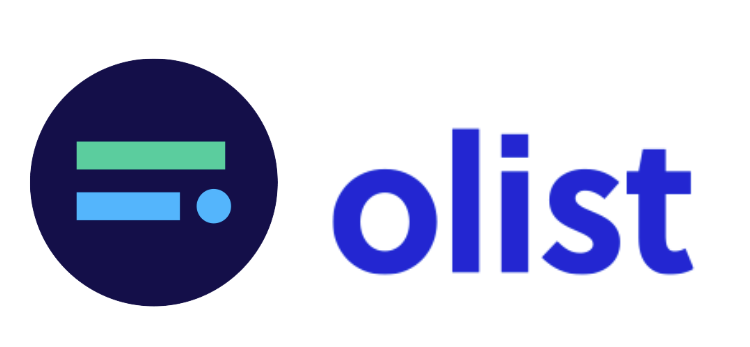

- Olist est implanté et n’opère qu’au Brésil.

- C’est une entreprise 100% numérique. En effet, les opérations commerciales sont entièrement gérées en ligne).

- Service e-commerce pour les vendeurs.

- Connecte les (petits) commerçants aux places de marché les plus importantes du Brésil (Amazon, Bahia, Walmart, ...).

- Offre des services de logistique et de gestion des stocks aux vendeurs.

- Ne vend rien directement aux consommateurs.




# Votre mission

Objectif :
Aider les chefs d'entreprise dans leur processus de prise de décision.


Le PDG d'Olist, vous a chargé de donner un sens à l'ensemble des données afin de formuler des recommandations sur la question suivante :

**Comment accroître la satisfaction des clients d’Olist ?**

# La data

Informations sur environ 100 000 commandes effectuées entre 2016 et 2018.
Des données réelles !
Les informations identifiables ont été anonymisées.
Documentation complète disponible dans le dictionnaire mis à disposition.

## Le déroulement pour chaque vendeur


Le vendeur rejoint Olist et met en ligne à disposition d’Olist ses catalogues de produits.
Olist affiche ces catalogues sur les plateformes commerciales existantes (Amazon, Bahia, Walmart, ...).
Le vendeur reçoit une notification dès qu'un produit est vendu.
Le vendeur transmet les articles commandés à des transporteurs logistiques tiers.

Attention : Plusieurs vendeurs peuvent être impliqués dans la commande d'un client !


## Le déroulement pour le client


Le client parcourt les produits sur  les plateformes commerciales (Amazon, Bahia, Walmart, ...).
Il achète les produits listés via Olist.store.
Il obtient une date prévue pour la livraison, en tenant compte de l’estimation de l'heure d'arrivée.
Le client reçoit la/les commande(s) et laisse un commentaire.

Remarque : entre 2016 et mi-2018, un avis pouvait être laissé dès l'envoi de la commande, ce qui signifie qu'un client pouvait potentiellement laisser un avis pour un produit qu'il n'avait pas encore reçu !





**Vous devrez faire une présentation dans un premier temps sous slides, qui contient au minimum le contexte, la problématique, ainsi que la conclusion qui contient des RECOMMANDATIONS faites au client, dans le but d'améliorer la satisfaction des clients d'Olist. Aussi, vous utiliserez un dashboard pour convaincre le client, pour que les recommandations soit logiques à ses yeux. Pour rappel, la recommandation est l'élément central d'une présentation réalisée par un data analyst. En effet, à vous d'être convaincant, pour que vos arguments soient entendus. Il est donc nécessaire de développer un minimum d'expertise métier sur le sujet, pour être à l'aise avec ses recommandations.** Le client n'est pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer vos choix sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.
Le juré examinateur, lors de la partie question, peut vous poser des questions sur le code qui est contenu dans votre google colab. Il est donc indispensable de mettre à disposition dans les pièces soumises pour le passage oral, votre travail exploratoire contenu dans un google colab.



## Livrables attendus
Le client souhaite une présentation avec des slides (sous format pdf) et un tableau de bord intéractif (Power BI, Tableau ou autre outil de BI).  

La présentation contiendra à minima ces éléments :
- Rappel du contexte et de la problématique
- Recommandations
- Analyse exploratoire des données
- Méthodologie, outils et langages utilisés
- NLP: Utilisation des reviews contenus dans `order_reviews_df`, en intégrant au moins un "wordcloud" dans votre tableau de bord.
- Votre tableau de bord contient des graphiques.
- Votre tableau de bord contient au moins une visualisation de données interactive.
- Votre tableau de bord contient au moins une carte représentant des informations géographiques.
- Votre tableau de bord contient au moins un tableau croisé.
- L'ensemble des graphiques et visuels doit être lisible par tous (prise en compte des personnes en situation de handicap visuel).
- Réponse à la question métier : Recommandations pour accroître la satisfaction des clients d'Olist.

# C'est parti ! Importer les données

Exécutes les cellules ci-dessous pour récupérer les tables de données.

In [67]:
import pandas as pd
import zipfile
import io
import requests

# import orders_customers_dataset
orders_customers_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/orders_customers_dataset.csv").drop(columns = "Unnamed: 0")

# import geolocation_dataset
response = requests.get("https://github.com/WildCodeSchool/wilddata/raw/main/geolocation_dataset.zip")
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall()
geolocation_df = pd.read_csv("geolocation_dataset.csv").drop(columns = "Unnamed: 0")

# import order_items_dataset
order_items_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/order_items_dataset.csv").drop(columns = "Unnamed: 0")

# import order_payments_dataset
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/order_payments_dataset.csv").drop(columns = "Unnamed: 0")

# import order_reviews_dataset
order_reviews_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/order_reviews_dataset.csv").drop(columns = "Unnamed: 0")

# import orders_dataset
order_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/orders_dataset.csv").drop(columns = "Unnamed: 0")

# import products_dataset
products_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/products_dataset.csv").drop(columns = "Unnamed: 0")

# import sellers_dataset
sellers_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/sellers_dataset.csv").drop(columns = "Unnamed: 0")

Voici le schéma de la base de données:



---

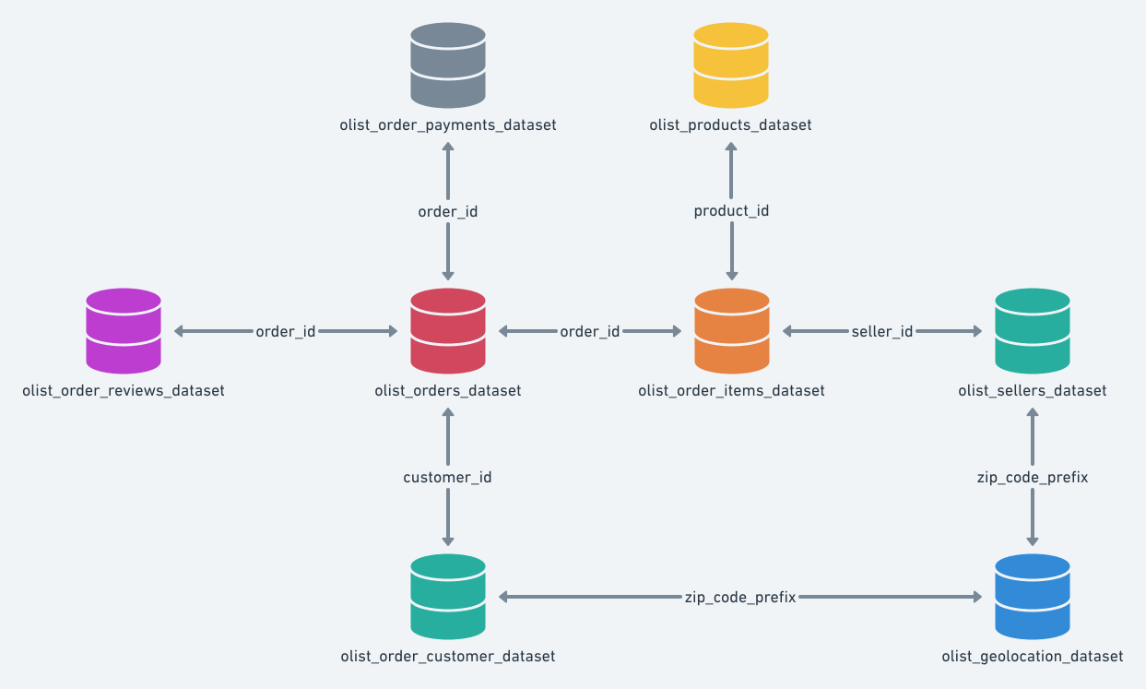

[Voici le dictionnaire qui permet d'avoir une explication détaillée](https://colab.research.google.com/drive/1c3mo2LuHMV3nPZigrS1O9mNaStNVH8jE?usp=sharing) sur chacune des colonnes de la base de données.

Votre travail commence ici: